In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from selenium import webdriver

In [7]:
options = webdriver.ChromeOptions() 
options.add_argument("start-maximized")
options.add_argument('--disable-blink-features=AutomationControlled')

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, options=options)

In [8]:
url = 'https://www.vivino.com/'

In [9]:
browser.visit(url)

In [10]:
html = browser.html
soup = BeautifulSoup(html)
type(soup)

bs4.BeautifulSoup

In [11]:
soup = BeautifulSoup(browser.html, 'html.parser')
# print(soup.prettify())

In [ ]:
#Your IP address (70.120.200.54) has been temporarily blocked for exceeding bulk request limits. If you believe this was done in error or you have legitimate needs to access our pages and data above and beyond these limits please contact admin@vivino.com with the subject 'Requests Blocked' and we'll try and resolve the issue.

In [17]:
wines = soup.find_all('div', class_="wineCard__topSection--11oVj")
len(wines)

16

In [18]:
rows = []

for wine in wines: 
    rating = wine.find('div', {'class':'vivinoRating_averageValue__uDdPM'}).text
    price = wine.find('div', {'class':'addToCartButton__price--qJdh4'}).text.strip('$')
    num_ratings = wine.find('div', {'class':'vivinoRating_caption__xL84P'}).text.split(' ')[0]
    brand = wine.find('div', {'class':'wineInfoVintage__truncate--3QAtw'}).text
    vintage = wine.find('div', {'class':'wineInfoVintage__vintage--VvWlU'}).text
    location = wine.find('div', {'class':'wineInfoLocation__regionAndCountry--1nEJz'}).text
    
    data = {'brand': brand, 'vintage': vintage, 'rating': rating, 'price': price, 'num_ratings': num_ratings, 'location': location}
    rows.append(data)

df_us = pd.DataFrame(rows)

AttributeError: 'NoneType' object has no attribute 'text'

In [19]:
df_us

NameError: name 'df_us' is not defined

In [ ]:
df_us.to_csv('backup_us.csv')

In [ ]:
html = browser.html
soup = BeautifulSoup(html)
type(soup)

In [ ]:
soup = BeautifulSoup(browser.html, 'html.parser')

In [ ]:
wines = soup.find_all('div', class_="wineCard__topSection--11oVj")
len(results)

In [ ]:
rows = []

for wine in wines: 
    rating = wine.find('div', {'class':'vivinoRating_averageValue__uDdPM'}).text
    price = wine.find('div', {'class':'addToCartButton__price--qJdh4'}).text.strip('$')
    num_ratings = wine.find('div', {'class':'vivinoRating_caption__xL84P'}).text.split(' ')[0]
    brand = wine.find('div', {'class':'wineInfoVintage__truncate--3QAtw'}).text
    vintage = wine.find('div', {'class':'wineInfoVintage__vintage--VvWlU'}).text
    location = wine.find('div', {'class':'wineInfoLocation__regionAndCountry--1nEJz'}).text
    
    data = {'brand': brand, 'vintage': vintage, 'rating': rating, 'price': price, 'num_ratings': num_ratings, 'location': location}
    rows.append(data)

df_int = pd.DataFrame(rows)

In [ ]:
df_int.head()

In [ ]:
df_int.to_csv('backup_int.csv')

In [13]:
df1 = pd.read_csv('backup_int.csv')
df2 = pd.read_csv('backup_us.csv')

In [14]:
df1

,Unnamed: 0,brand,vintage,rating,price,num_ratings,location
0,0,Vega Sicilia,Unico 2010,4.8,455.00,1499,"Ribera del Duero, Spain"
1,1,Casanova di Neri,Cerretalto Brunello di Montalcino 2016,4.8,420.00,141,"Brunello di Montalcino, Italy"
2,2,Brunelli,Campo Inferi Amarone della Valpolicella Classi...,4.8,64.99,48,"Amarone della Valpolicella Classico, Italy"
3,3,Dominio de Cair,Pendón De La Aguilera 2011,4.8,219.99,45,"Ribera del Duero, Spain"
4,4,Château Gilette,Sauternes (Crème de Tête) 1997,4.8,384.99,37,"Sauternes, France"
...,...,...,...,...,...,...,...
270,270,Pegau,Châteauneuf-du-Pape Cuvée Laurence 2017,4.5,119.99,46,"Châteauneuf-du-Pape, France"
271,271,Dominio del Águila,Canta la Perdiz 2015,4.5,399.99,45,"Ribera del Duero, Spain"
272,272,Cascina Chicco,Barolo Riserva Ginestra 2009,4.5,148.99,42,"Barolo, Italy"
273,273,Feudo Montoni,Vrucara Nero d'Avola 2017,4.5,57.99,42,"Sicilia, Italy"


In [15]:
df2

,Unnamed: 0,brand,vintage,rating,price,num_ratings,location
0,0,Paul Hobbs,Beckstoffer Las Piedras Vineyard Cabernet Sauv...,4.8,329.95,74,"St. Helena, United States"
1,1,Trefethen,HāLo 2017,4.8,249.00,50,"Oak Knoll District, United States"
2,2,Bryant Family Vineyard,Cabernet Sauvignon Proprietor Grown 2002,4.8,479.99,48,"Napa Valley, United States"
3,3,Schrader,Cabernet Sauvignon RBS Beckstoffer To Kalon Vi...,4.8,424.00,34,"Oakville, United States"
4,4,The Vineyardist,Cabernet Sauvignon 2014,4.8,280.99,33,"Napa Valley, United States"
...,...,...,...,...,...,...,...
270,270,Fisher Vineyards,Coach Insignia Cabernet Sauvignon 2008,4.5,209.00,57,"Napa Valley, United States"
271,271,Episode,Red Blend 2010,4.5,99.95,56,"Napa Valley, United States"
272,272,Argyle,Extended Tirage Brut 2009,4.5,84.99,54,"Willamette Valley, United States"
273,273,Axr,Cabernet Sauvignon 2018,4.5,74.99,52,"Napa Valley, United States"


In [16]:
frames = [df1, df2]
df = pd.concat(frames)
df

,Unnamed: 0,brand,vintage,rating,price,num_ratings,location
0,0,Vega Sicilia,Unico 2010,4.8,455.00,1499,"Ribera del Duero, Spain"
1,1,Casanova di Neri,Cerretalto Brunello di Montalcino 2016,4.8,420.00,141,"Brunello di Montalcino, Italy"
2,2,Brunelli,Campo Inferi Amarone della Valpolicella Classi...,4.8,64.99,48,"Amarone della Valpolicella Classico, Italy"
3,3,Dominio de Cair,Pendón De La Aguilera 2011,4.8,219.99,45,"Ribera del Duero, Spain"
4,4,Château Gilette,Sauternes (Crème de Tête) 1997,4.8,384.99,37,"Sauternes, France"
...,...,...,...,...,...,...,...
270,270,Fisher Vineyards,Coach Insignia Cabernet Sauvignon 2008,4.5,209.00,57,"Napa Valley, United States"
271,271,Episode,Red Blend 2010,4.5,99.95,56,"Napa Valley, United States"
272,272,Argyle,Extended Tirage Brut 2009,4.5,84.99,54,"Willamette Valley, United States"
273,273,Axr,Cabernet Sauvignon 2018,4.5,74.99,52,"Napa Valley, United States"


In [20]:
df2 = df['location'].str.split(',', expand=True)
df2

,0,1
0,Ribera del Duero,Spain
1,Brunello di Montalcino,Italy
2,Amarone della Valpolicella Classico,Italy
3,Ribera del Duero,Spain
4,Sauternes,France
...,...,...
270,Napa Valley,United States
271,Napa Valley,United States
272,Willamette Valley,United States
273,Napa Valley,United States


In [40]:
df2 = df2.rename(columns={0 : "region", 1 : "country"})
df2 = pd.DataFrame(df2)

In [47]:
df_both = df.join(df2)
df_both

,brand,vintage,rating,price,num_ratings,location,region,country
0,Vega Sicilia,Unico 2010,4.8,455.00,1499,"Ribera del Duero, Spain",Ribera del Duero,Spain
0,Vega Sicilia,Unico 2010,4.8,455.00,1499,"Ribera del Duero, Spain",St. Helena,United States
0,Paul Hobbs,Beckstoffer Las Piedras Vineyard Cabernet Sauv...,4.8,329.95,74,"St. Helena, United States",Ribera del Duero,Spain
0,Paul Hobbs,Beckstoffer Las Piedras Vineyard Cabernet Sauv...,4.8,329.95,74,"St. Helena, United States",St. Helena,United States
1,Casanova di Neri,Cerretalto Brunello di Montalcino 2016,4.8,420.00,141,"Brunello di Montalcino, Italy",Brunello di Montalcino,Italy
...,...,...,...,...,...,...,...,...
273,Axr,Cabernet Sauvignon 2018,4.5,74.99,52,"Napa Valley, United States",Napa Valley,United States
274,Castello di Ama,Vigneto La Casuccia Chianti Classico Gran Sele...,4.5,204.50,42,"Chianti Classico, Italy",Chianti Classico,Italy
274,Castello di Ama,Vigneto La Casuccia Chianti Classico Gran Sele...,4.5,204.50,42,"Chianti Classico, Italy",Napa Valley,United States
274,Brian Arden,West Kade Red 2014,4.5,149.99,51,"Napa Valley, United States",Chianti Classico,Italy


In [48]:
test = df_both["vintage"].str.extract(r'(\w+)$')
test

,0
0,2010
0,2010
0,2015
0,2015
1,2016
...,...
273,2018
274,2015
274,2015
274,2014


In [49]:
test = test.rename(columns={0 : "year"})
test

,year
0,2010
0,2010
0,2015
0,2015
1,2016
...,...
273,2018
274,2015
274,2015
274,2014


In [50]:
df = df_both.join(test)

In [52]:
df = df.drop('location', axis=1)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4400 entries, 0 to 274
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        4400 non-null   object 
 1   vintage      4400 non-null   object 
 2   rating       4400 non-null   float64
 3   price        4400 non-null   float64
 4   num_ratings  4400 non-null   int64  
 5   region       4400 non-null   object 
 6   country      4400 non-null   object 
 7   year         4280 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 309.4+ KB


In [56]:
df

,brand,vintage,rating,price,num_ratings,region,country,year
0,Vega Sicilia,Unico 2010,4.8,455.00,1499,Ribera del Duero,Spain,2010
0,Vega Sicilia,Unico 2010,4.8,455.00,1499,Ribera del Duero,Spain,2010
0,Vega Sicilia,Unico 2010,4.8,455.00,1499,Ribera del Duero,Spain,2015
0,Vega Sicilia,Unico 2010,4.8,455.00,1499,Ribera del Duero,Spain,2015
0,Vega Sicilia,Unico 2010,4.8,455.00,1499,St. Helena,United States,2010
...,...,...,...,...,...,...,...,...
274,Brian Arden,West Kade Red 2014,4.5,149.99,51,Chianti Classico,Italy,2014
274,Brian Arden,West Kade Red 2014,4.5,149.99,51,Napa Valley,United States,2015
274,Brian Arden,West Kade Red 2014,4.5,149.99,51,Napa Valley,United States,2015
274,Brian Arden,West Kade Red 2014,4.5,149.99,51,Napa Valley,United States,2014


In [ ]:
#Data Science

In [78]:
data = df.groupby("country")['rating'].mean().sort_values(ascending=False)


<AxesSubplot:title={'center':'Book Checkouts by Patron Type'}, ylabel='country'>

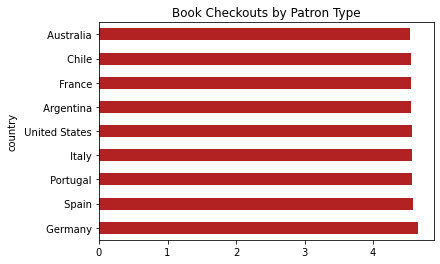

In [70]:
data.plot(kind="barh", title="Average Rating by Country", color="firebrick", ylabel="Number of Checkouts")


In [71]:
price_data = df.groupby("country")['price'].mean().sort_values(ascending=False)

<AxesSubplot:title={'center':'Average Price by Country'}, ylabel='country'>

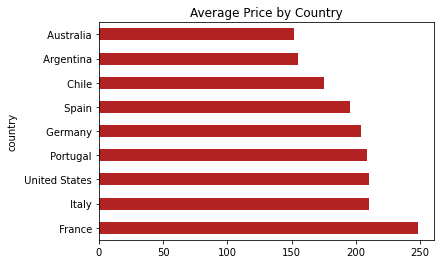

In [79]:
price_data.plot(kind="barh", title="Average Price by Country", color="firebrick", ylabel="Butts")

In [74]:
num_rate_data = df.groupby("country")['num_ratings'].mean().sort_values(ascending=False)

<AxesSubplot:title={'center':'Average Price by Country'}, ylabel='country'>

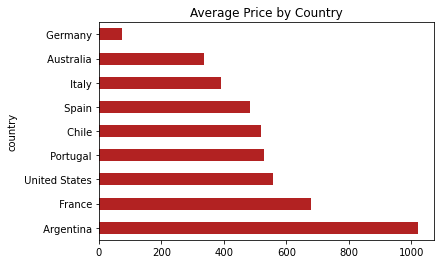

In [75]:
num_rate_data.plot(kind="barh", title="Average Price by Country", color="firebrick", ylabel="Number of Checkouts")